In [1]:
# pip install jax
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/chaotic\ cortex

Mounted at /content/drive
/content/drive/My Drive/chaotic cortex


In [2]:
from pathlib import Path
import time
import jax.numpy as jnp
import matplotlib.pyplot as plt

exec(open("functions.py").read())

In [3]:
# set basic parameters and subdirectory
part_n = 300
e_part_r = 0.8
e_mean = 4
ei_std_s = [4, 4]
short_interval_len = 300
subdirectory = "resolution/"
#Path(subdirectory).mkdir()
print(ei_spectral_radius_fct(e_part_r, ei_std_s))

seed = 0
print(subdirectory)

4.0
resolution/


In [6]:
# generate and save parameters for simulation
key = jax.random.PRNGKey(seed)

sub_part_r_s = jnp.asarray([e_part_r, 1 - e_part_r])
sub_part_n_s = sub_part_n_s_fct(part_n, sub_part_r_s)
unscaled_mean = ei_mean_balancer(sub_part_n_s, e_mean)
unscaled_std = jnp.tile(jnp.asarray([ei_std_s]), (2, 1))
connectivity_n = 5
in_r = 1.
rewiring_prob = 1.
[connectivity_s, key] = row_sum_removing_sparsifier(connectivity_s_generator(sub_part_n_s,
                                                                             unscaled_mean, unscaled_std,
                                                                             connectivity_n,
                                                                             key),
                                                    sub_part_n_s, in_r, rewiring_prob)
jnp.savez(subdirectory + "parameter_s_1.npz",
          sub_part_r_s, sub_part_n_s, unscaled_mean, unscaled_std,
          connectivity_n,
          in_r, rewiring_prob,
          connectivity_s)

sub_part_n_s_ext_gen = jnp.asarray([part_n])
ext_part_n = round(part_n / 100)
unscaled_ext_mean = jnp.asarray([[0.]])
unscaled_ext_std = jnp.asarray([[1.]])
ext_sub_part_r_s = jnp.asarray([1.])
ext_sub_part_n_s = sub_part_n_s_fct(ext_part_n, ext_sub_part_r_s)
ext_connectivity_n = 3
[ext_connectivity_s, key] = ext_connectivity_s_generator(sub_part_n_s_ext_gen, ext_sub_part_n_s,
                                                         unscaled_ext_mean, unscaled_ext_std,
                                                         ext_connectivity_n,
                                                         key)
jnp.savez(subdirectory + "parameter_s_2.npz",
          sub_part_n_s_ext_gen, ext_part_n, unscaled_ext_mean, unscaled_ext_std, ext_sub_part_r_s,
          ext_sub_part_n_s,
          ext_connectivity_n,
          ext_connectivity_s)

phase_n = 3
[phase_s, key] = phase_s_generator(ext_part_n, phase_n, key)
jnp.savez(subdirectory + "parameter_s_3.npz",
          phase_n,
          phase_s)

amp_s = jnp.expand_dims(jnp.asarray([0.2, 0.4, 0.8]), 1) # or (wave_n, ext_part_n) arrays so different ext parts have different amps
freq_s = jnp.full(amp_s.shape, 0.)
wave_s = jnp.concatenate([amp_s, freq_s], axis = 1)
wave_n = wave_s.shape[0]
jnp.savez(subdirectory + "parameter_s_4.npz",
          amp_s, freq_s,
          wave_s,
          wave_n)

initial_condition_mean = jnp.full((part_n, ), 0)
initial_condition_cov = jnp.identity(part_n)
initial_condition_n = 5
ext_condition_n = ext_connectivity_n * phase_n
initial_condition_n_free = initial_condition_n * ext_condition_n
[initial_condition_s, key] = initial_condition_s_generator(part_n, initial_condition_mean, initial_condition_cov, initial_condition_n_free, key)
jnp.savez(subdirectory + "parameter_s_5.npz",
          initial_condition_mean, initial_condition_cov,
          initial_condition_n,
          ext_condition_n, initial_condition_n_free,
          initial_condition_s)

condition_s = jnp.asarray([1])
short_interval_n_in_long_s = jnp.asarray([1])
short_interval_n = jnp.sum(short_interval_n_in_long_s)
tot_interval = jnp.asarray([0, short_interval_n * short_interval_len])
time_interval_info = [tot_interval, condition_s, short_interval_n_in_long_s]
condition_s_free = jnp.asarray([0])
time_interval_info_free = [tot_interval, condition_s_free, short_interval_n_in_long_s]
jnp.savez(subdirectory + "parameter_s_6.npz",
          condition_s, short_interval_n_in_long_s,
          short_interval_n, tot_interval, time_interval_info,
          condition_s_free, time_interval_info_free)

resolution = 24
jnp.savez(subdirectory + "parameter_s_7.npz",
          resolution)

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


In [12]:
# load parameters
[sub_part_r_s, sub_part_n_s, unscaled_mean, unscaled_std,
 connectivity_n,
 in_r, rewiring_prob,
 connectivity_s] = load_as_list(subdirectory + "parameter_s_1.npz")

[sub_part_n_s_ext_gen, ext_part_n, unscaled_ext_mean, unscaled_ext_std, ext_sub_part_r_s,
 ext_sub_part_n_s,
 ext_connectivity_n,
 ext_connectivity_s] = load_as_list(subdirectory + "parameter_s_2.npz")

[phase_n,
 phase_s] = load_as_list(subdirectory + "parameter_s_3.npz")

[amp_s, freq_s,
 wave_s,
 wave_n] = load_as_list(subdirectory + "parameter_s_4.npz")

[initial_condition_mean, initial_condition_cov,
 initial_condition_n,
 ext_condition_n, initial_condition_n_free,
 initial_condition_s] = load_as_list(subdirectory + "parameter_s_5.npz")

[condition_s, short_interval_n_in_long_s,
 short_interval_n, tot_interval, time_interval_info,
 condition_s_free, time_interval_info_free] = load_as_list(subdirectory + "parameter_s_6.npz",
                                                           allow_pickle = True)

[resolution] = load_as_list(subdirectory + "parameter_s_7.npz")

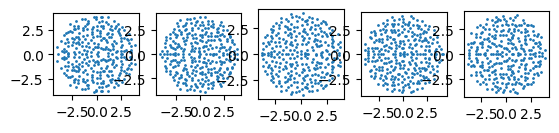

In [13]:
# plot spectra
[fig, subfig_s] = plt.subplots(1, int(connectivity_n))
for connectivity_idx in range(connectivity_n):
  temp_spectrum = jnp.linalg.eig(connectivity_s[connectivity_idx])[0]
  subfig_s[connectivity_idx].plot(jnp.real(temp_spectrum), jnp.imag(temp_spectrum),
                                  linestyle="", marker=".", markersize = 2)
  subfig_s[connectivity_idx].set_aspect('equal')

In [ ]:
# run and save stats
resolution_stat_s_free = resolution_effect_fct(connectivity_s, wave_s[:1], ext_connectivity_s[:1], phase_s[:1], initial_condition_s,
                                 time_interval_info_free, resolution)
np.savez_compressed(subdirectory + "resolution_stats_free.npz", *resolution_stat_s_free) # jax has not implemented savez_compressed as of 23/08/23

resolution_stat_s = resolution_effect_fct(connectivity_s, wave_s, ext_connectivity_s, phase_s, initial_condition_s[::ext_condition_n],
                            time_interval_info, resolution)
np.savez_compressed(subdirectory + "resolution_stats.npz", *resolution_stat_s)

[5, 'connectivity_n']
[1, 'wave_n']
[1, 'ext_connectivity_n']
[1, 'phase_n']
[45, 'initial_condition_n']
[1, 'short_interval_n']
['mean', 'pr', 'tr', 'ori']
1693998488
1693998591,0
1693998692,1
1693998792,2
1693998893,3
1693998993,4
[5, 'connectivity_n']
[3, 'wave_n']
[3, 'ext_connectivity_n']
[3, 'phase_n']
[5, 'initial_condition_n']
[1, 'short_interval_n']
['mean', 'pr', 'tr', 'ori']
1693998994
1693999292,0
1693999590,1
1693999886,2
1694000184,3
1694000481,4


In [36]:
# load stats
resolution_stat_s_free = load_as_list(subdirectory + "resolution_stats_free.npz")
resolution_stat_s = load_as_list(subdirectory + "resolution_stats.npz")

preliminary plotting

In [17]:
# for later plotting
import matplotlib.patches as mpatches
color_s = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [33]:
resolution_stat_s[2][...,1] = resolution_stat_s[2][...,1] * 24

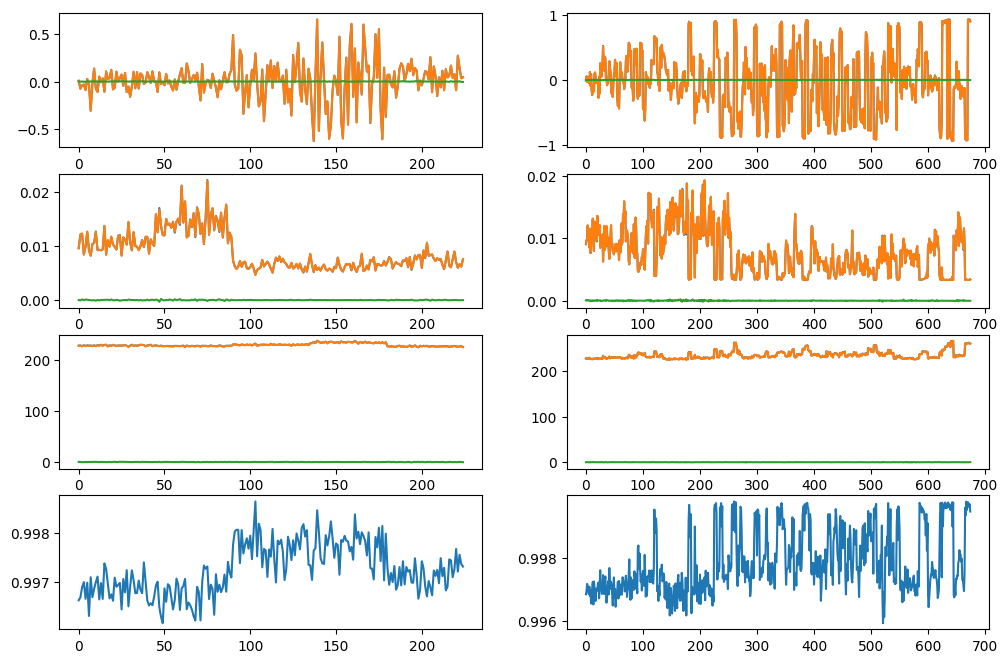

In [41]:
[fig, subfig_s] = plt.subplots(4, 2, figsize=(6*2,2*4))

for idx in range(3):
  subfig_s[idx, 0].plot(resolution_stat_s_free[idx][...,0].flatten())
  subfig_s[idx, 0].plot(resolution_stat_s_free[idx][...,1].flatten())
  subfig_s[idx, 0].plot(resolution_stat_s_free[idx][...,1].flatten() - resolution_stat_s_free[idx][...,0].flatten())
  subfig_s[idx, 1].plot(resolution_stat_s[idx][...,0].flatten())
  subfig_s[idx, 1].plot(resolution_stat_s[idx][...,1].flatten())
  subfig_s[idx, 1].plot(resolution_stat_s[idx][...,1].flatten() - resolution_stat_s[idx][...,0].flatten())

subfig_s[3, 0].plot(resolution_stat_s_free[3].flatten())
subfig_s[3, 1].plot(resolution_stat_s[3].flatten())